# 고양이 바운딩박스 만들기

In [ ]:
import numpy as np

cats = np.load('/content/cat_bbs.npz')
images = cats['image']
bbs = cats['bbs']

In [ ]:
X_train = images/255.
y_train = bbs.astype('float32')

In [ ]:
from tensorflow import keras

In [ ]:
# 모델

mobilenet = keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top = False,
    weights='imagenet'
)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet.trainable=False

model = keras.Sequential([
    mobilenet,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='linear')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               8028288   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
___________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20, batch_size=1)

Epoch 1/20
114/114 [==============================] - 14s 8ms/step - loss: 1332.7411 - mae: 25.5834
Epoch 2/20
114/114 [==============================] - 1s 8ms/step - loss: 937.8824 - mae: 22.8835
Epoch 3/20
114/114 [==============================] - 1s 8ms/step - loss: 475.8404 - mae: 15.5061
Epoch 4/20
114/114 [==============================] - 1s 8ms/step - loss: 242.2165 - mae: 11.2576
Epoch 5/20
114/114 [==============================] - 1s 8ms/step - loss: 178.5764 - mae: 9.3685
Epoch 6/20
114/114 [==============================] - 1s 8ms/step - loss: 102.4799 - mae: 7.6814
Epoch 7/20
114/114 [==============================] - 1s 8ms/step - loss: 68.4864 - mae: 6.1380
Epoch 8/20
114/114 [==============================] - 1s 8ms/step - loss: 46.0139 - mae: 5.0487
Epoch 9/20
114/114 [==============================] - 1s 8ms/step - loss: 37.9770 - mae: 4.5211
Epoch 10/20
114/114 [==============================] - 1s 8ms/step - loss: 42.3083 - mae: 4.7004
Epoch 11/20
114/114 [======

In [ ]:
y_pred = model.predict(X_train)   # test 데이터가 없어서 이걸로..

In [ ]:
y_pred[:5]

array([[ 72.00989 ,  25.83414 , 169.48425 , 107.16682 ],
       [ 15.890301,  32.784122, 125.90121 , 124.90957 ],
       [102.79931 ,  76.48654 , 160.18008 , 133.05254 ],
       [ 43.662727,  34.600582, 161.18814 , 149.1902  ],
       [ 28.249214,  44.155106, 143.01361 , 137.85106 ]], dtype=float32)

In [ ]:
y_pred = y_pred.astype('int')

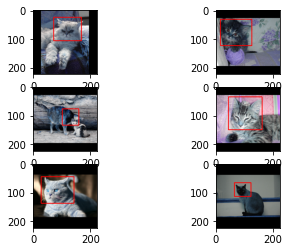

In [ ]:
import cv2
import matplotlib.pyplot as plt

for i in range(6):
  img = cv2.rectangle(X_train[i], 
                      tuple((y_pred[i][0], y_pred[i][1])),
                      tuple((y_pred[i][2], y_pred[i][3])),
                      color=(255,0,0),
                      thickness=2)
  plt.subplot(3,2,i+1)
  plt.imshow(img)
plt.show()